In [59]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import plotly.graph_objects as go
import warnings

import desc
from desc.transform import Transform
from desc.equilibrium import EquilibriaFamily, Equilibrium
from desc.plotting import plot_1d,plot_2d,plot_3d,plot_comparison, plot_section, plot_fsa, plot_surfaces, plot_grid
from desc.optimize import Optimizer
from desc.examples import get
from desc.objectives.getters import get_fixed_boundary_constraints, maybe_add_self_consistency
from desc.grid import LinearGrid, QuadratureGrid, Grid
from desc.profiles import PowerSeriesProfile

from desc.backend import jnp
from desc.compute import get_params, get_profiles, get_transforms
from desc.compute.utils import _compute as compute_fun
from desc.nestor import Nestor
from desc.objectives.objective_funs import _Objective
from desc.singularities import (
    DFTInterpolator,
    FFTInterpolator,
    virtual_casing_biot_savart,
    _nonsingular_part,
    _kernel_biot_savart,
)
from desc.utils import Timer, errorif, warnif

from desc.objectives.normalization import compute_scaling_factors

In [60]:
eq = get("HELIOTRON")

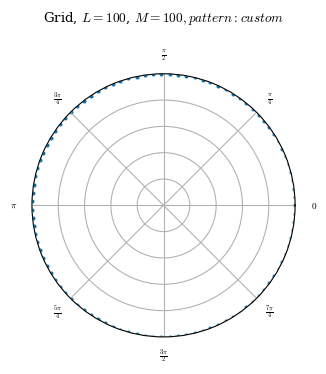

In [65]:
res = 100
nodes = np.zeros((res, 3))
nodes[:, 0] = 1
nodes[:, 1] = np.linspace(0, 2*np.pi, res)
source_spacing = np.zeros((res, 3))
source_spacing[:, 1] = 2*np.pi/(res+1)
source_spacing[:, 2] = 2*np.pi
source_grid = Grid(nodes=nodes, spacing=source_spacing)
eval_grid = LinearGrid(rho=0.5, M=8, N=8, NFP=int(eq.NFP))

plot_grid(source_grid)
plt.savefig("source_grid.png", dpi=500)

In [67]:
keys = [
            "K_vc",
            "B",
            "|B|^2",
            "R",
            "phi",
            "Z",
            "e^rho",
            "n_rho",
            "|e_theta x e_zeta|",
            "p",
        ]
data_source = eq.compute(keys, grid=source_grid)
data_eval = eq.compute(keys, grid=eval_grid)
K_source = data_source["K_vc"]

k = min(source_grid.num_theta, source_grid.num_zeta)
s = k // 2 + int(np.sqrt(k))
q = k // 2 + int(np.sqrt(k))

In [68]:
Bplasma = _nonsingular_part(
        data_eval, eval_grid, data_source, source_grid, s, kernel=_kernel_biot_savart,
    )
print(Bplasma)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

In [56]:
plot_3d(eq, "B_rho", eval_grid)